# Get Basic Sales Summary from a Tiny SQLite Database using Python

## Import libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Load CSV into pandas

In [3]:
# Load CSV file
csv_file = "online_sales.csv" 
df = pd.read_csv(csv_file)

# Preview data
df.head()

,id,sales_person,country,product,order_date,amount,boxes_shipped
0,1,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320,180
1,2,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896,94
2,3,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501,91
3,4,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342
4,5,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184


## Save CSV data into SQLite database

In [4]:
# Connect to (or create) SQLite database
conn = sqlite3.connect("sales_data.db")

# Save dataframe into "sales" table (replaces if already exists)
df.to_sql("sales", conn, if_exists="replace", index=False)

print("Data inserted into SQLite database successfully!")

Data inserted into SQLite database successfully!


## Preview of CSV Data

In [5]:
df = pd.read_csv("online_sales.csv")  # let pandas use the first row as headers
df.head()

,id,sales_person,country,product,order_date,amount,boxes_shipped
0,1,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320,180
1,2,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896,94
2,3,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501,91
3,4,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342
4,5,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184


## Load CSV and create SQLite table

In [6]:
import sqlite3
import pandas as pd

# Load CSV (this time with headers automatically)
df = pd.read_csv("online_sales.csv")

# Connect to database
conn = sqlite3.connect("sales_data.db")

# Save dataframe into SQLite table
df.to_sql("sales", conn, if_exists="replace", index=False)

print("✅ Data loaded into sales_data.db")

✅ Data loaded into sales_data.db


## Summary by product

In [7]:
query = """
SELECT product,
       SUM(boxes_shipped) AS total_qty,
       SUM(amount) AS revenue
FROM sales
GROUP BY product
"""
sales_summary = pd.read_sql_query(query, conn)

print("=== Sales Summary ===")
print(sales_summary)

=== Sales Summary ===
                 product  total_qty  revenue
0         50% Dark Bites       9792   341712
1         70% Dark Bites       8015   211610
2          85% Dark Bars       7793   299229
3        99% Dark & Pure       8127   299796
4            After Nines       8257   261331
5           Almond Choco       6736   277536
6    Baker's Choco Chips       6998   249613
7   Caramel Stuffed Bars       8717   231588
8   Choco Coated Almonds       6464   241486
9          Drinking Coco       8660   256655
10               Eclairs       8757   312445
11      Fruit & Nut Bars       7738   259147
12    Manuka Honey Choco       7781   275541
13             Milk Bars       8330   269248
14       Mint Chip Choco       8207   283969
15          Orange Choco       7732   256144
16   Organic Choco Syrup       7749   294700
17   Peanut Butter Cubes       8304   324842
18       Raspberry Choco       7115   264740
19    Smooth Sliky Salty       8810   349692
20   Spicy Special Slims       86

## Plot Bar Chart

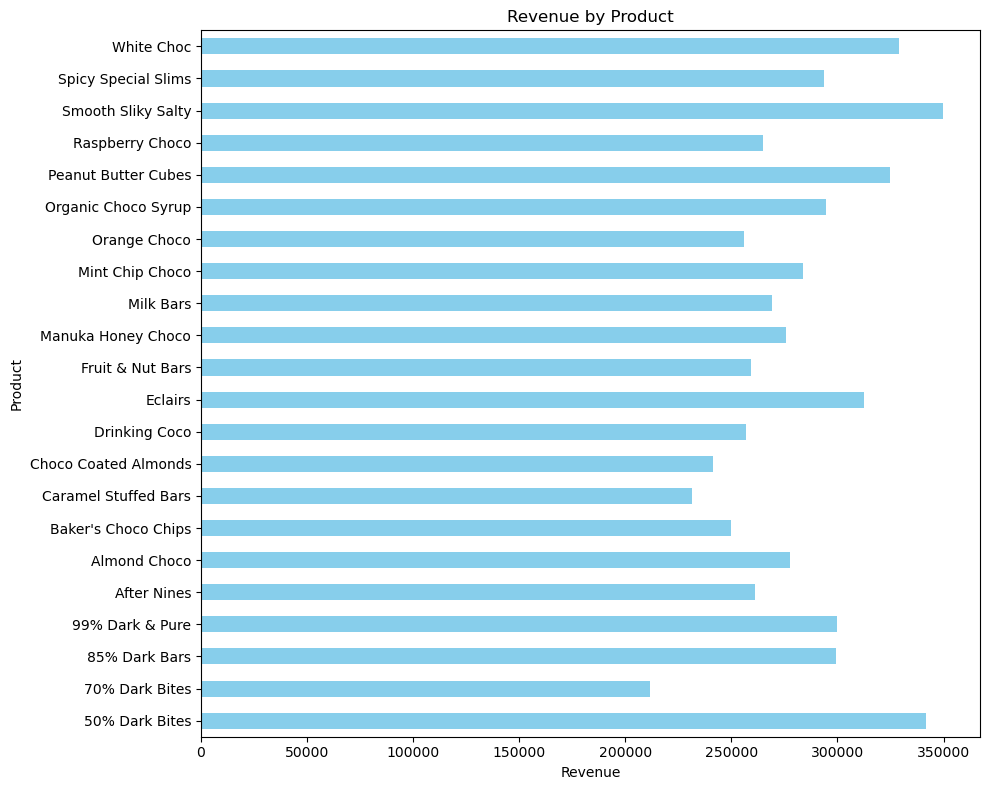

In [11]:
sales_summary.plot(
    kind='barh',
    x='product',
    y='revenue',
    legend=False,
    color='skyblue',
    figsize=(10,8)
)

plt.title("Revenue by Product")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

## Close connection

In [12]:
conn.close()